In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Step 1: Define system parameters
a = 8e-9  # lattice spacing
N = 2000  # number of lattice sites
sigma = 1*0.026 # disorder parameter in kT

In [3]:
# STEP 2: Use gaussian random number to generate energy sites
site_energies = np.random.normal(loc=0, scale=sigma, size=N)



In [4]:
# Step 3: Calculate net site energies with electric field
F = 2e6  # electric field in V/cm
site_positions = np.arange(N) * a
net_site_energies = site_energies - F * site_positions


In [5]:

delta_e = np.zeros((2*N))
for i in range(N):
    for j in range(i - 1,i + 1):
        if net_site_energies[j]-net_site_energies[i] > 0:
            delta_e[j] = net_site_energies[j]-net_site_energies[i]
        else:
            delta_e[j]=0

In [6]:

# Step 4: Calculate hopping rates
v0 = 1e12  # attempt frequency
kT = 0.026  # Boltzmann constant times temperature
delta_d = a  # in nearest neighbour
v_ij = np.zeros((2*N,2*N))
for i in range(N):
    for j in [i-1,i+1]:
        delta_d = a  # in nearest neighbour
        v_ij[i,j] = (v0 * np.exp(-delta_e[j]/kT) * np.exp(-2*delta_d/a))

In [7]:
p_ij = np.zeros((2*N,2*N))
for i in range(N):
    v_i = np.sum(v_ij[i, :])
    if v_i > 0:
        p_ij[i, i-1] = v_ij[i, i-1] / v_i
        p_ij[i, i+1] = v_ij[i, i+1] / v_i

In [8]:
# Step 6: Perform Monte Carlo simulation
Ne = 100  # number of electrons to simulate
N_hops = 10000  # number of hops per electron
x_final = np.zeros(Ne)
t_final = np.zeros(Ne)
for n in range(Ne):
    x = N//2  # start at the middle of the lattice
    t = 0
    for i in range(N_hops):
               #use uniform random number to generate probability of electron hopping to a energy site
        r = np.random.uniform(0,1)
        if r < p_ij[x, x+1]:
            x += 1
        else:
            x -= 1
        if x == N or x == -1:
            break  # electron escaped, end simulation early
        v_x = np.sum(v_ij[x, :])
        if v_x == 0:
            break  # trapped electron, end simulation early
        #Use exponential random number to determine time step involved in hop
        ht = np.random.exponential(scale=1)
       
        t += ht/v_x
    x_final[n] = x
    t_final[n] = t

In [9]:
# Step 7: Calculate mobility
vd = np.mean(x_final) * a / np.mean(t_final)
mu = vd / F
print(f"Mobility = {mu:.3e} m^2/Vs")

Mobility = 5.273e-05 m^2/Vs


Text(0, 0.5, 'x position  ')

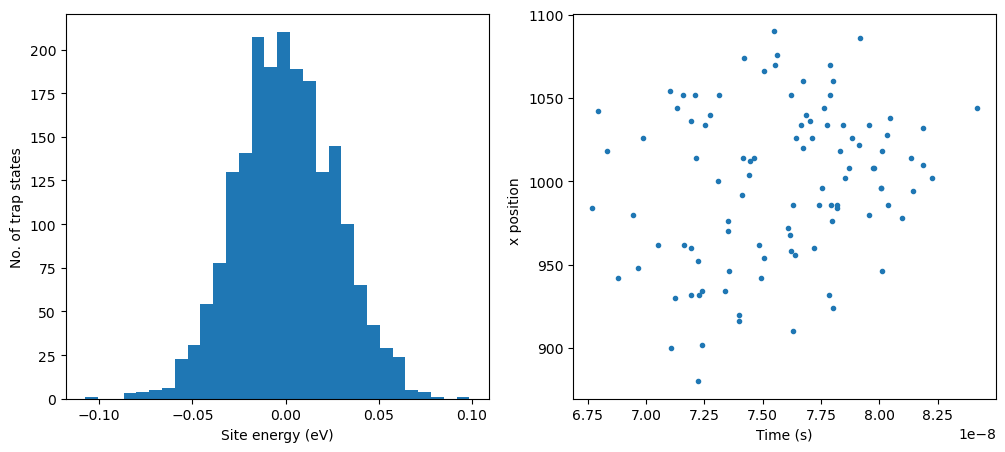

In [10]:
# Plot histograms of site energies, position vs time, and x_final
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(site_energies, bins=30)
ax[0].set_xlabel("Site energy (eV)")
ax[0].set_ylabel("No. of trap states")
ax[1].plot(t_final, x_final ,".")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("x position  ")


